In this part the following modules will be covered:

- file handling: `os json pickle pathlib`

# Part 3. Standard library: file handling

The task is the same: replace `...` (Ellipsis) symbols with suitable pieces of code and run the tests.

In [2]:
FILES_STR = 'pt3_files'

## `os`

You can use this module to access files and directories on your PC.

In [3]:
import os

`os.path.join`

This function enables you to join paths. This method is in all ways superior to concatenating path strings with `+` as it takes into account OS-specific symbols.

Let's create a path to the `1.json` file located in `json_files/` subdirectory in `FILES` directory

In [4]:
JSON_SUBDIR = 'json_files'; FILENAME = 'foijy.json'
bad_way = FILES_STR + '/' + JSON_SUBDIR + '/' + FILENAME
good_way = os.path.join(FILES_STR, JSON_SUBDIR, FILENAME)
# note: there's even a better way to do this with pathlib

print(bad_way, good_way, sep='\n')

pt3_files/json_files/foijy.json
pt3_files\json_files\foijy.json


`os.listdir`

Use this function to get a list of all files in a directory.

In [5]:
def all_json_files_os() -> list[str]:
    '''
    Return a list of all .json filenames from the `json_files/` directory.
    '''
    return [filename for filename in os.listdir(os.path.join(FILES_STR, JSON_SUBDIR)) if filename.endswith('.json')]

In [6]:
# test
res = all_json_files_os()
assert len(res) == 5, 'Wrong number of json files'
assert all(el.endswith('.json') for el in res), 'Contains non-json file formats'


## `pathlib`

An even better (object-oriented) way to deal with paths. 

This modules allows for storing them now as strings, but as the `Path` objects.

In [7]:
from pathlib import Path

We use the intuitive division operator (`/`) to create child paths.

Note: when getting child pathds (`A / B / C`) it is sufficient that only one of those is a `Path` object, the rest can be strings. E.g.:
- `Path('A') / Path('B') / Path('C')` -- ok, but not necessary;
- `Path('A') / 'B' / 'C'` -- ok;
- `'A' / Path('B') / 'C'` -- ok;
- `'A' / 'B' / 'C'` -- not ok, because all are strings.

In [9]:
FILES_PL = Path(FILES_STR); JSON_SUBDIR_STR = 'json_files'; FILENAME = 'foijy.json'

best_way = FILES_PL / JSON_SUBDIR / FILENAME
print(best_way)

pt3_files\json_files\foijy.json


Also get useful information about the file/folder at destination:

In [10]:
print('is directory (points to a folder):', best_way.is_dir())
print('is file:', best_way.is_file())
print('check if the file exists:', best_way.exists())
print('file\'s extension:', best_way.suffix)
print('file\'s size:', best_way.stat().st_size, 'bytes')

is directory (points to a folder): False
is file: True
check if the file exists: True
file's extension: .json
file's size: 894 bytes


We can even open the file with the `.open` method:

In [ ]:
with best_way.open() as f:
    print(f.read())

# this is literally the same as
#   with open(best_way) as f:
#       print(f.read())

You can use these `Path` objects in same way as the string paths. However, they come with added functionality. 

In [13]:
# return the absolute path
abs_path = best_way.absolute() # or .resolve()
print(abs_path)

c:\Users\Airat\contents\teaching-coding\intros\pt3_files\json_files\foijy.json


In [18]:
# return the path parts
print(best_way.parts)

# return all path parts
print(abs_path.parts) 

('pt3_files', 'json_files', 'foijy.json')
('c:\\', 'Users', 'Airat', 'contents', 'teaching-coding', 'intros', 'pt3_files', 'json_files', 'foijy.json')


In [15]:
# return the contents of a directory matching a given pattern
json_folder = FILES_PL / JSON_SUBDIR
print('all files:', list(json_folder.glob(pattern='*.*'))) 
print('json only:', list(json_folder.glob(pattern='*.json'))) 

all files: [WindowsPath('pt3_files/json_files/abfdfg.json'), WindowsPath('pt3_files/json_files/adghgr.json'), WindowsPath('pt3_files/json_files/d9iwer.json'), WindowsPath('pt3_files/json_files/foijy.json'), WindowsPath('pt3_files/json_files/siouyue.json'), WindowsPath('pt3_files/json_files/trash.txt'), WindowsPath('pt3_files/json_files/trash2.dat')]
json only: [WindowsPath('pt3_files/json_files/abfdfg.json'), WindowsPath('pt3_files/json_files/adghgr.json'), WindowsPath('pt3_files/json_files/d9iwer.json'), WindowsPath('pt3_files/json_files/foijy.json'), WindowsPath('pt3_files/json_files/siouyue.json')]


Further reading: https://docs.python.org/3/library/pathlib.html

In [57]:
def no_a_files() -> list[Path]:
    """
    Return a list of paths of all files from the `pt3_files` directory that don't contain the letter 'a'
    in their name (only the name, not the full path!)
    """
    # hint: use FILES_PL
    return [file for file in FILES_PL.rglob('*.*') if 'a' not in file.name]

In [58]:
# test
res = no_a_files()
assert len(res) == 5
assert all(isinstance(p, Path) for p in res)
assert all('pt3_files' in p.parts for p in res)
assert {p.stem for p in res} == {'d9iwer', 'foijy', 'rubbish', 'siouyue', 'ids'}

Now, write the same all_json_files function, but use `pathlib` instead of os (like you should).

In [43]:
def all_json_files() -> list[Path]:
    '''
    Return a list of all .json filenames from the `json_files/` directory.
    '''
    return list((FILES_PL / JSON_SUBDIR).glob('*.json'))

In [46]:
# test
res = all_json_files()
assert len(res) == 5
assert all(p.suffix == '.json' for p in res)
assert all(p.is_file() for p in res)
assert all('pt3_files' in p.parts for p in res)

## `json`

JSON format is widely used to serialize dictionary-like objects.

It can store any combination of pure:
- strings
- numbers
- lists
- dictionaries
- boolean values
- `None`
objects (their json representations, rather).

In [34]:
import json

For example, this is a valid JSON:

In [35]:
valid_json = {
    "key1": "value1",
    "key2": 2,
    "key3": [1, 2, 3],
    "key4": {
        "key5": "value5"
    },
    "key6": True,
    "key7": None
}

In [36]:
# `dumps` function converts a Python object into a json string if possible
json.dumps(valid_json)

'{"key1": "value1", "key2": 2, "key3": [1, 2, 3], "key4": {"key5": "value5"}, "key6": true, "key7": null}'

And this is not:

In [39]:
invalid_json = {
    (1, 2): "read the error message!",
    "try putting each": lambda x: 2*x,
    "of these lines": json,
    "on the first line in this object": slice(0, None, None)
}

In [ ]:
json.dumps(invalid_json) # TypeError: Object of type 'function' is not JSON serializable

Read that `abfdfg.json` json file and return it as a `dict` object.

In [41]:
def simple_read_json() -> dict:
    '''
    Returns a dictionary generated from the contents of ./pt2.2_files/json_files/abfdfg.json.
    '''
    path = Path(FILES_PL) / JSON_SUBDIR / 'abfdfg.json'
    with path.open() as f:
        return json.load(f)

In [48]:
# test
res = simple_read_json()
assert res['school_name'] == 'HSE'
assert res['reg_code'][:4] == 'dbf3'
assert len(res['grades']) == 26

Do the tests pass?

If yes, now use the `all_json_files` function to get all json filenames, open all of them one by one, create a summary in one `list` of `dict`s and save it to a file called `summary.json` to the `pt2.2_files/output/` directory.

The summary dictionary should have the following format:

```
summary = [
    {
        'school_name': ...,
        'reg_code_7': ...,
        'average_grade': ...
    },
    ...
]
```

That is, a list of dictionaries with the following keys: 
- `school_name`, 
- `reg_code_7` (first 7 charachters of the original `'reg_code'`)
- `average_grade` (arithmetic mean of the original `'grades'` list rounded to 3 decimal digits).

In [49]:
from statistics import mean # use this instead of sum(grades)/len(grades)

def create_summary_object() -> list[dict]:
    '''
    Create a summary object as described above
    in a form of a list of dictionaries.

    Hint 1: use `all_json_files` to access the filenames.
    '''
    json_files = all_json_files()
    summary = []
    for jf in json_files:
        with jf.open() as f:
            raw_data = json.load(f)
        summary.append(
            {
                'school_name': raw_data['school_name'],
                'reg_code_7': raw_data['reg_code'][:7],
                'average_grade': round(mean(raw_data['grades']), 3)
            }
        )
    return summary

In [61]:
# test
res = create_summary_object()
assert isinstance(res, list), 'result must be a list object'
assert all(isinstance(el, dict) for el in res), 'each element must be a dict object'
assert len(res) == 5
assert {el['reg_code_7'] for el in res} == {'dbf3fd7', 'e5dcffe', 'c701f30', '51c670b', 'bfe3a1c'}, \
    'Something wrong with the reg_code_7 fields'

Now, save this object in the `summary.json` file.

In [55]:
SAVE_TO = Path(FILES_PL) / 'output' / 'summary.json'

def save_summary():
    '''
    Save the result of `create_summary_object` to a file named `summary.json` in the `output` directory.
    '''
    summary = create_summary_object()
    SAVE_TO.parent.mkdir(parents=True, exist_ok=True)
    with open(SAVE_TO, 'w') as f:
        json.dump(summary, f)

save_summary()

In [56]:
# test
assert SAVE_TO.exists(), f'{SAVE_TO} file does not exist'
with SAVE_TO.open() as f: assert res == json.load(f), 'Object saved and object created are not equal'

## `.jsonl` files

JSONL (JSON Lines) is a format where each line is a separate JSON object. This is useful when you want to store a large number of JSON objects in a single file and read them one by one **without loading the whole file into memory**.

This file format is often used to store logs, for example.

The `pt3_files/grades.jsonl` file contains a list of dictionaries, each representing a student's points.

For example:
```jsonl
{"id": 126783, "grades": 84.9}
{"id": 437584, "grades": 54.1}
{"id": 912947, "grades": 77.0}
```

Read the file <ins>**line by line**</ins> and return a tuple containing
- the average grade of all students
- the id of the student with the highest grade

For the example above, the result would be `(72.0, 126783)`.

In [72]:
GRADES_JSONL = FILES_PL / 'grades.jsonl'

# this file could have been much larger (to an extent where it wouldn't fit into memory), but it's just an example
print(f'{GRADES_JSONL.stat().st_size * 2**-20:.2f} MB')

6.41 MB


In [76]:
def avg_and_best() -> tuple[float, int]:
    """
    Read the `grades.jsonl` file and return a tuple with
    the average grade and the id of the highest performing student.

    Do not round the average grade, just return the float as is.

    DO NOT LOAD THE WHOLE FILE INTO MEMORY!
    """
    with GRADES_JSONL.open() as f:
        best_id, best_grade = 0, 0.
        total, count = 0., 0
        for line in f:
            data = json.loads(line)
            total += data['grade']
            count += 1
            if data['grade'] > best_grade:
                best_id, best_grade = data['id'], data['grade']
        return total / count, best_id

In [77]:
# test
import math

avg, best = avg_and_best()
assert math.isclose(avg, 50.50800419530119)
assert best == 125359

### BONUS: reading `json` from urls

One can also read json data directly from a url address:

In [78]:
from urllib.request import urlopen

URL = 'https://global-warming.org/api/ocean-warming-api'
response = urlopen(URL)

data = json.loads(response.read())

In [79]:
print(data)
print(data['description'])
print(f'in total: {len(data["result"])} temperature measurements')

{'error': None, 'result': {'1880': '-0.03', '1881': '0.04', '1882': '0.03', '1883': '-0.04', '1884': '-0.12', '1885': '-0.17', '1886': '-0.16', '1887': '-0.20', '1888': '-0.01', '1889': '0.00', '1890': '-0.24', '1891': '-0.09', '1892': '-0.14', '1893': '-0.19', '1894': '-0.21', '1895': '-0.10', '1896': '0.03', '1897': '-0.01', '1898': '-0.17', '1899': '-0.10', '1900': '-0.02', '1901': '-0.12', '1902': '-0.19', '1903': '-0.34', '1904': '-0.43', '1905': '-0.22', '1906': '-0.19', '1907': '-0.27', '1908': '-0.40', '1909': '-0.44', '1910': '-0.41', '1911': '-0.40', '1912': '-0.25', '1913': '-0.30', '1914': '-0.15', '1915': '-0.08', '1916': '-0.26', '1917': '-0.32', '1918': '-0.18', '1919': '-0.20', '1920': '-0.21', '1921': '-0.18', '1922': '-0.24', '1923': '-0.24', '1924': '-0.24', '1925': '-0.21', '1926': '-0.11', '1927': '-0.17', '1928': '-0.21', '1929': '-0.27', '1930': '-0.14', '1931': '-0.10', '1932': '-0.18', '1933': '-0.23', '1934': '-0.17', '1935': '-0.17', '1936': '-0.13', '1937': 

In [80]:
def create_years_anomalies() -> tuple[list[int], list[float]]:
    '''
    Extract useful measurements from the `data` dictionary stored under the `'result'` key
    as another dictionary.
    Return a tuple of (list of years as ints, list of temperatures as floats)
    '''
    years = []; anomalies = []
    for y, a in data['result'].items():
        years.append(int(y))
        anomalies.append(float(a))
    return years, anomalies

In [81]:
yrs, anom = create_years_anomalies()

In [83]:
# test
import math
assert isinstance(yrs[0], int), 'Elements of yrs must be integers'
assert isinstance(anom[0], float), 'Elements of anom must be floats'

If previous tests passed, run the second next cell to plot a graph of "temperature anomaly by year".

Make sure that you have the `matplotlib` module installed by running the next cell.

In [ ]:
%pip install matplotlib

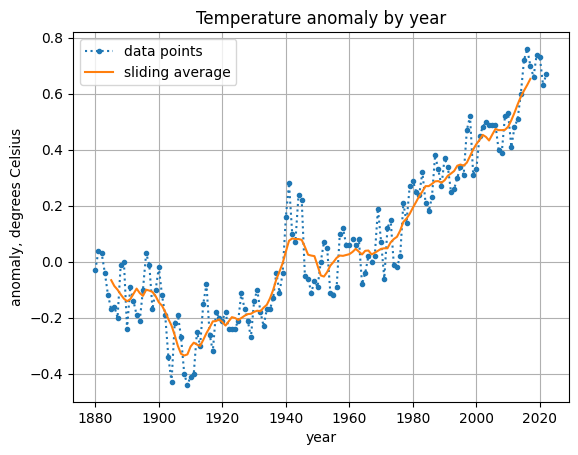

In [84]:
from matplotlib import pyplot as plt
from statistics import mean

# generating sliding average data
anom_sliding = []
win_size = 5
for i in range(win_size, len(anom) - win_size):
    anom_sliding.append(mean(anom[i-win_size:i+win_size]))

# plt.plot(yrs, [0] * len(yrs))
plt.plot(yrs, anom, ':.', label='data points')
plt.plot(yrs[win_size:-win_size], anom_sliding, label='sliding average')
plt.title('Temperature anomaly by year')
plt.xlabel('year')
plt.ylabel('anomaly, degrees Celsius')
plt.grid()
plt.legend()
plt.show()

## `csv`

CSV = comma separated values. It's a serialization method to store table-like objects.

First line contains names of the columns (normally, separated by commas). Next lines contain data corresponding to those columns. Take a look at the `pt2.2_files/csv_files/example.csv` file to get a better picture of how the data is stored.

In [85]:
import csv
CSV_SUBDIR = Path(FILES_PL) / 'csv_files'

You can read a json file using the `csv.DictReader`. This will make each row a dictionary with column names as keys:

In [86]:
with (CSV_SUBDIR / 'example.csv').open() as f:
    csv_reader = csv.DictReader(f)
    for row in csv_reader:
        print(row)

{'name': 'John', 'surname': 'Jordan', 'age': '34'}
{'name': 'Kaely', 'surname': 'Nill', 'age': '32'}
{'name': 'William', 'surname': 'Wonka', 'age': '38'}
{'name': 'Joe', 'surname': '', 'age': '23'}
{'name': 'Catherine', 'surname': 'Schultz', 'age': '29'}


_Note_ that an empty value in the 4th row has been replaced with an empty string.

You probably won't need to use the `csv` module as is, because this format is supported by many site-packages (like `numpy`, `pandas`, etc.) where there exist separate functions designed to deal with `.csv` files.

For example, there is how easy it is to read a matrix in `numpy`:

In [ ]:
# numpy is a side-package; make sure that it is installed on your PC
%pip install numpy

In [88]:
import numpy as np
MATRIX_FILEPATH = CSV_SUBDIR / 'matrix.csv'
matr = np.loadtxt(MATRIX_FILEPATH, dtype=np.int8, delimiter=',')
print(matr)

[[ 1  2  3]
 [ 2  5  4]
 [ 3 -5  1]]


### "Titanic Survivors" dataset

Let's take a look at the titanic data - the information about the passengers of the Titanic. The file is located at `pt3_files/csv_files/titanic.csv`.

In [89]:
TITANIC_CSV = CSV_SUBDIR / 'titanic.csv'

## `pickle`

See the `pickle_pickle_pickle.py` skeleton.

In [ ]:
# TODO: move it here